<a href="https://colab.research.google.com/github/Shadoww002/DeepLearning-PyTorch/blob/main/Chapter%204%20%E2%80%93%20Custom%20Datasets/CustomDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt


In [109]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [110]:
## Getting DATA
import requests
import zipfile
from pathlib import Path

## setup path to data folder
data_path = Path("data/")
image_path = data_path/"pizza_steak_sushi"

## check if exist
if image_path.is_dir():
  print(f"{image_path} already Exist ...")
else :
  print(f"{image_path} Does Not Exixst ...Creating It")
  image_path.mkdir(parents=True,
                   exist_ok=True)

## Download Data
with open(data_path/"pizza_steak_sushi.zip" , "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading Data ....")
  f.write(request.content)

## Unzip zip Files
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip" , "r") as zip_ref:
  print("UnZiping The Data ...")
  zip_ref.extractall(image_path)


data/pizza_steak_sushi already Exist ...
UnZiping The Data ...


In [111]:
## Explore Data Set
import os

def walk_through_dir(dir_path):
  for dirpath , dirnames , filenames in os.walk(dir_path) :
    print(f"There are {len(dirnames)} directories ans {len(filenames)} images in {dirpath}'.'")


In [112]:
walk_through_dir(image_path)

There are 2 directories ans 0 images in data/pizza_steak_sushi'.'
There are 3 directories ans 0 images in data/pizza_steak_sushi/test'.'
There are 0 directories ans 31 images in data/pizza_steak_sushi/test/sushi'.'
There are 0 directories ans 25 images in data/pizza_steak_sushi/test/pizza'.'
There are 0 directories ans 19 images in data/pizza_steak_sushi/test/steak'.'
There are 3 directories ans 0 images in data/pizza_steak_sushi/train'.'
There are 0 directories ans 72 images in data/pizza_steak_sushi/train/sushi'.'
There are 0 directories ans 78 images in data/pizza_steak_sushi/train/pizza'.'
There are 0 directories ans 75 images in data/pizza_steak_sushi/train/steak'.'


In [113]:
##Setup Train and Test paths
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir , test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/test/sushi/343036.jpg
Image class: sushi
Image height: 512
Image width: 384


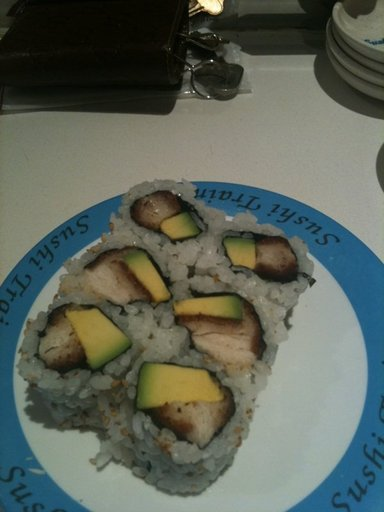

In [114]:
import random
from PIL import Image

# Set seed
# random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

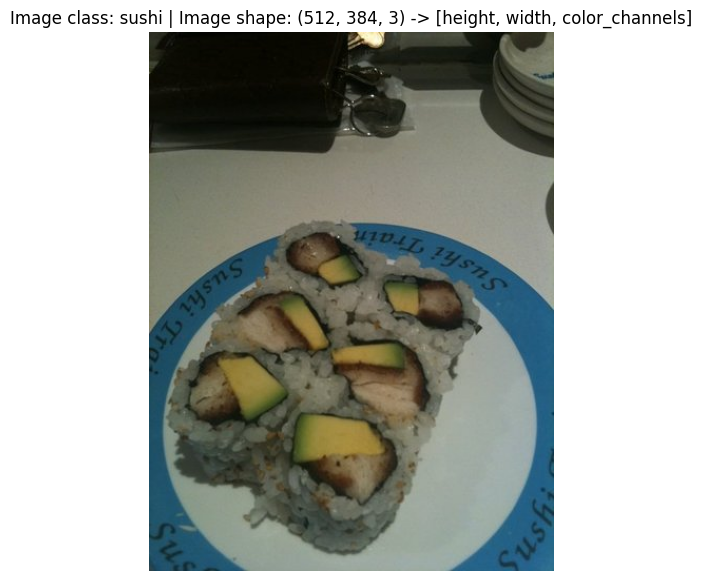

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

array([[[ 46,  46,  38],
        [ 45,  45,  37],
        [ 44,  46,  35],
        ...,
        [103, 105,  81],
        [103, 105,  81],
        [101, 103,  79]],

       [[ 45,  45,  37],
        [ 45,  45,  37],
        [ 44,  46,  35],
        ...,
        [106, 108,  84],
        [105, 107,  83],
        [103, 105,  81]],

       [[ 42,  44,  33],
        [ 43,  45,  34],
        [ 44,  46,  35],
        ...,
        [109, 111,  87],
        [106, 108,  84],
        [105, 107,  83]],

       ...,

       [[ 51,  71,  80],
        [ 46,  71,  78],
        [ 42,  69,  80],
        ...,
        [ 46, 113, 142],
        [ 44, 111, 140],
        [ 43, 110, 139]],

       [[ 50,  69,  76],
        [ 45,  68,  74],
        [ 43,  67,  77],
        ...,
        [ 47, 114, 141],
        [ 44, 111, 138],
        [ 41, 108, 135]],

       [[ 48,  67,  73],
        [ 45,  65,  72],
        [ 43,  68,  75],
        ...,
        [ 48, 115, 142],
        [ 44, 111, 138],
        [ 40, 107, 134]]], dtype=uint8)
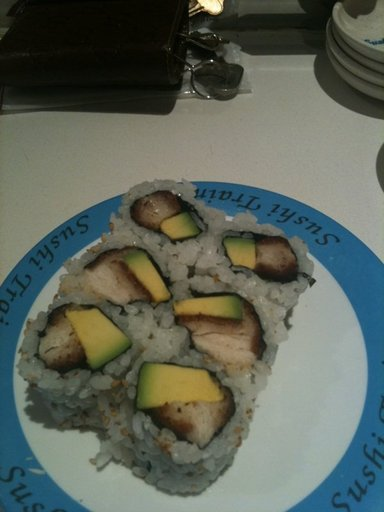

In [116]:
img_as_array

In [117]:
### Using Torch Transform to transform Data
import torch
from torch.utils.data import DataLoader
from torchvision import datasets , transforms

In [118]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [119]:
data_transform(img)

tensor([[[0.1765, 0.1529, 0.0863,  ..., 0.1765, 0.2745, 0.4275],
         [0.1686, 0.1098, 0.0627,  ..., 0.2549, 0.3922, 0.4588],
         [0.1569, 0.1216, 0.0745,  ..., 0.4314, 0.4627, 0.4745],
         ...,
         [0.1333, 0.1176, 0.1020,  ..., 0.1451, 0.1490, 0.1529],
         [0.1255, 0.1255, 0.1137,  ..., 0.1529, 0.1608, 0.1686],
         [0.1333, 0.1176, 0.1294,  ..., 0.1647, 0.1725, 0.1765]],

        [[0.1843, 0.1608, 0.0941,  ..., 0.1804, 0.2784, 0.4353],
         [0.1843, 0.1137, 0.0588,  ..., 0.2588, 0.4000, 0.4667],
         [0.1647, 0.1255, 0.0745,  ..., 0.4392, 0.4745, 0.4902],
         ...,
         [0.3216, 0.3020, 0.2431,  ..., 0.3647, 0.4000, 0.4118],
         [0.3059, 0.3137, 0.2784,  ..., 0.3961, 0.4118, 0.4235],
         [0.2784, 0.3059, 0.3216,  ..., 0.4039, 0.4235, 0.4353]],

        [[0.1412, 0.1176, 0.0588,  ..., 0.1216, 0.2078, 0.3451],
         [0.1294, 0.0706, 0.0314,  ..., 0.2039, 0.3255, 0.3765],
         [0.1059, 0.0784, 0.0392,  ..., 0.3647, 0.3961, 0.

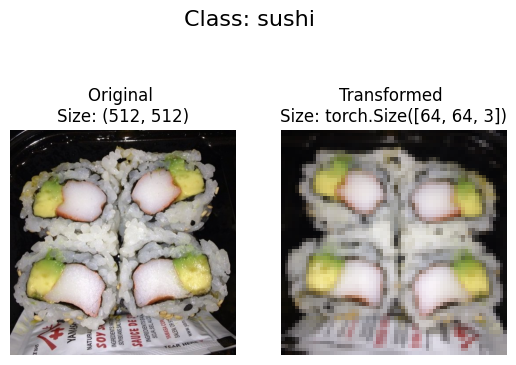

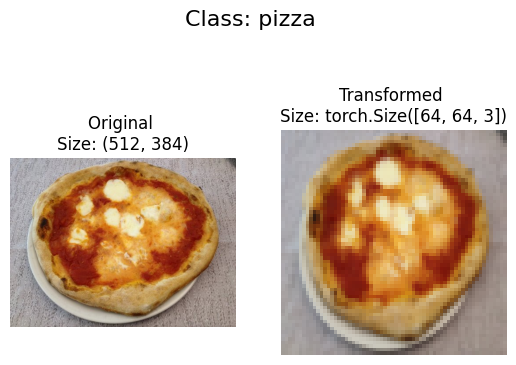

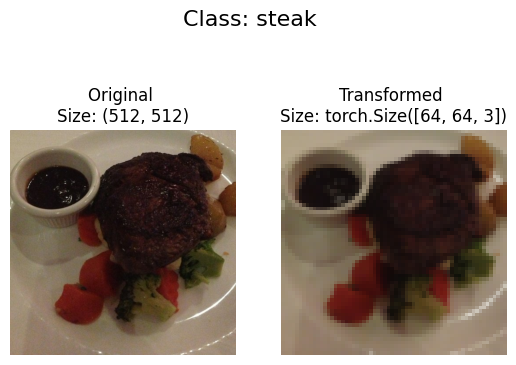

In [120]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

In [121]:
## Option 1 : Using ImageFolder To Load The Images from dir to tensor and DataLoader
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform = data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform = data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [122]:
train_data.classes

['pizza', 'steak', 'sushi']

In [123]:
class_name = train_data.classes
class_name

['pizza', 'steak', 'sushi']

In [124]:
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [125]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [126]:
len(train_data) , len(test_data)

(225, 75)

In [127]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [128]:
train_data[0]

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [129]:
img , label = train_data[0][0] , train_data[0][1]

In [130]:
img

tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0902, 0.0902, 0.

In [131]:
label

0

In [132]:
class_name[label]

'pizza'

In [133]:
## Change img dimension i.e putting Color chanel at last
img_permute = img.permute(1, 2 , 0)
img_permute.shape

torch.Size([64, 64, 3])

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

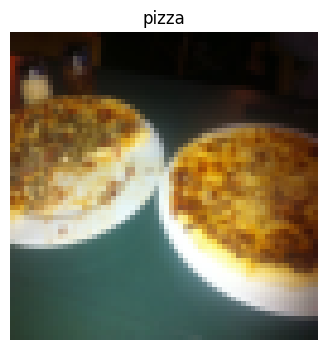

In [134]:
plt.figure(figsize=(6, 4))
plt.imshow(img_permute)
plt.title(class_name[label])
plt.axis(False)

In [135]:
import os
os.cpu_count()

2

In [136]:
## Converting DataSet To DataLoader
train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = 1,
    num_workers=os.cpu_count(),
    shuffle=True
)
test_dataloader = DataLoader(
    dataset = test_data,
    shuffle=False ,
    batch_size=1,
    num_workers=os.cpu_count(),
)

In [137]:
train_dataloader.dataset

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [138]:
len(train_dataloader) , len(test_dataloader)

(225, 75)

In [139]:
img , label = next(iter(train_dataloader))
img.shape , label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [140]:
## Option-2 : Loading Image Data With Custom Datasets
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple , Dict , List


In [141]:
## Instance of torchvison dataset ImageFolder()
train_data.classes , train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [142]:
## setup Path
target_directory = train_dir
print(f"target Dir : {target_directory}")

target Dir : data/pizza_steak_sushi/train


In [143]:
list(os.scandir(target_directory))

[<DirEntry 'sushi'>, <DirEntry 'pizza'>, <DirEntry 'steak'>]

In [144]:
class_name_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_name_found

['pizza', 'steak', 'sushi']

In [145]:
##Making Function To Find class and Class to idx Dict for a Directory
def find_classes(directory : str)->Tuple[List[str] , Dict[str , int]]:

  ##geting Class Names
  classes = sorted(entry.name for entry in list(os.scandir(directory)) if entry.is_dir())

  ## Error for Not Found
  if not classes :
    raise FileNotFoundError(f"Could not any classes in {directory}.")

  ##creating Dict for label to index
  class_to_idx = {cls_name : i for i , cls_name in enumerate(classes) }

  return classes , class_to_idx

In [146]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [147]:
## Creating a custom "Dataset" class to replicate "ImageFolder"

from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
  def __init__(self,target_dir : str , transform = None):

    # creating Class attributes
    self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes , self.class_to_idx = find_classes(target_dir)

  ## Make Func to Load images
  def load_image(self , index : int)->Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  ##Overwrite __len__()
  def __len__(self) -> int:
    return len(self.paths)

  ## Overwrite __getitem__()
  def __getitem__(self, index:int) -> Tuple[torch.Tensor , int] :
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    ## Transform if Necessary
    if self.transform:
      return self.transform(img) , class_idx
    else:
      return img , class_idx

In [148]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [149]:
train_data_custom = ImageFolderCustom(target_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(target_dir=test_dir,
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7b2e6ae37790>,
 <__main__.ImageFolderCustom at 0x7b2e3f7cbcd0>)

In [150]:
len(train_data_custom) , len(test_data_custom)

(225, 75)

In [151]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [152]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [153]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


In [154]:
## Creating Function To Viualise random Images
def display_random_images(dataset : torch.utils.data.Dataset,
                          classes : List[str] = None,
                          n : int = 10 ,
                          display_shape : bool = True,
                          seed : int = None):
  if n>10:
    n = 10
    display_shape = False
    print(f" n Shouldn't be Greater than 10 , adjusting It to 10 and Removing Shape")

  if seed :
    random.seed(seed)

  random_sample_idx = random.sample(range(len(dataset)) , k = n)

  plt.figure(figsize=(16,8))

  for i , target_sample in enumerate(random_sample_idx):
    target_image , target_label = dataset[target_sample][0] , dataset[target_sample][1]

    target_image_adj = target_image.permute(1,2,0)

    plt.subplot(1 , n , i+1)
    plt.imshow(target_image_adj)
    plt.axis(False)
    if classes :
      title = f"Class : {classes[target_label]}"
      if display_shape:
        title = title + f"\nShape : {target_image_adj.shape}"
    plt.title(title)


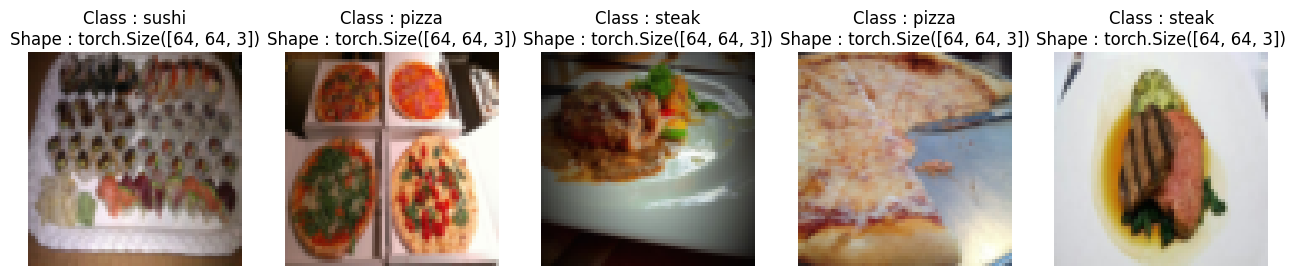

In [155]:
display_random_images(dataset=train_data,
                      n = 5,
                      classes = class_name,
                      seed =None)

 n Shouldn't be Greater than 10 , adjusting It to 10 and Removing Shape


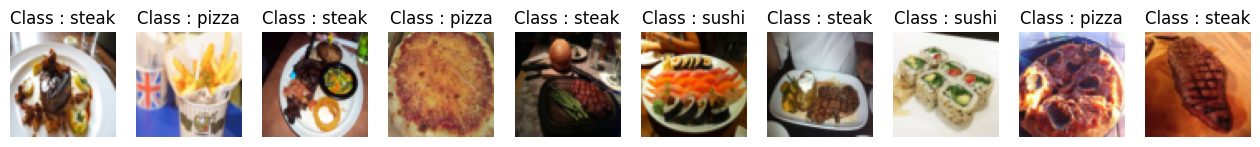

In [156]:
## Display Image using Custom ImageFolder
display_random_images(dataset=train_data_custom,
                      n = 20,
                      classes = class_name,
                      seed =None)


In [157]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1,
                                    num_workers=0,
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7b2e3fccf790>,
 <torch.utils.data.dataloader.DataLoader at 0x7b2e6aeb0e90>)

In [158]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [159]:
## Data Augmentation

In [160]:
## let try Truvaul Augmentataion
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [161]:
image_path

PosixPath('data/pizza_steak_sushi')

In [162]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/sushi/2276986.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2521706.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/479711.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2715127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1600999.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/988559.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/684266.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3806282.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/207578.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3837522.jpg')]

In [163]:
class_name

['pizza', 'steak', 'sushi']

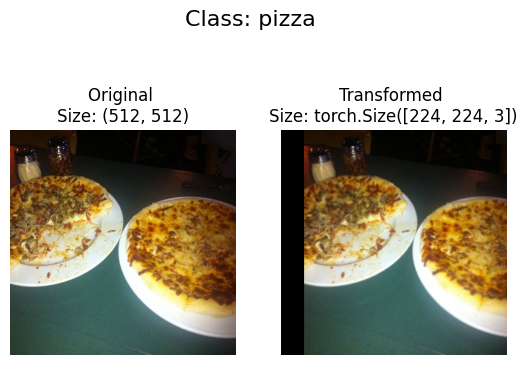

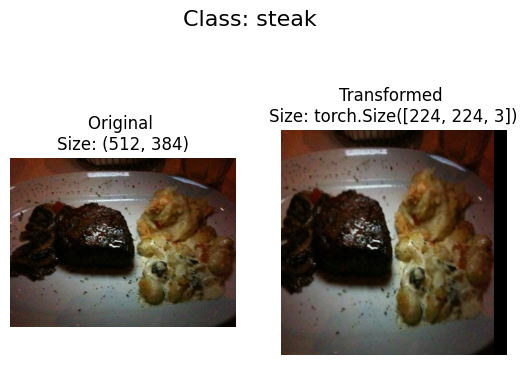

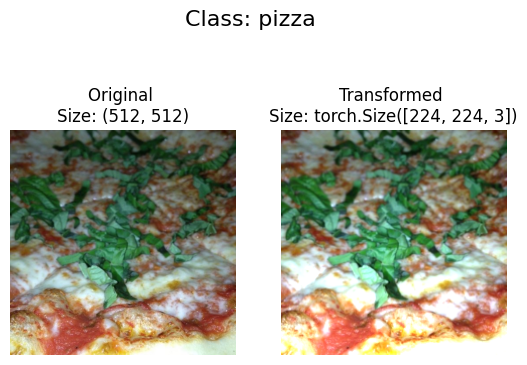

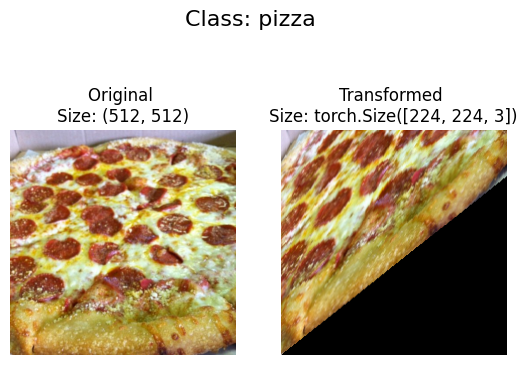

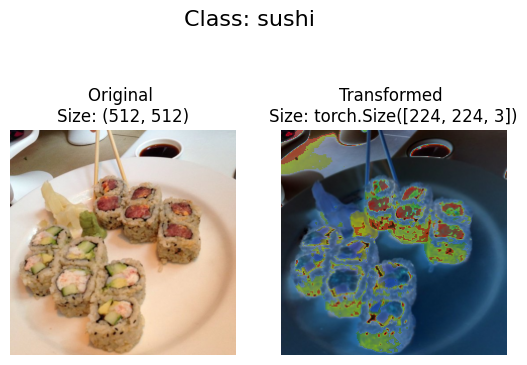

In [164]:
plot_transformed_images(image_path_list,train_transform , n= 5)

In [165]:
## Building The Base Line Model without Data Augmentation

In [166]:
## Creating Transform
simple_tranform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [167]:
##Dir
train_dir

PosixPath('data/pizza_steak_sushi/train')

In [168]:
## Loading Data
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root = train_dir,
                                         transform=simple_tranform)
test_data_simple = datasets.ImageFolder(root = test_dir,
                                        transform=simple_tranform)

import os
from torch.utils.data import DataLoader

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=32,
                                     num_workers=os.cpu_count(),
                                     shuffle=True)

test_dataloader_simple = DataLoader(dataset = test_data_simple ,
                                    batch_size = 32,
                                    shuffle=False,
                                    num_workers=os.cpu_count())

In [169]:
## Creating Model Class

In [170]:
class tinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int) -> None:
    super().__init__()

    self.conv_block1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=0
        ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.conv_block2 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=0
        ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.claasifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block1(x)
    # print(x.shape)
    x = self.conv_block2(x)
    # print(x.shape)
    x = self.claasifier(x)
    # print(x.shape)
    return x

    # return self.claasifier(self.conv_block2(self.conv_block1(x))) #Operator Fusion Benefits

In [171]:
torch.manual_seed(42)

model_0 = tinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=3
).to(device)

model_0

tinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (claasifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [172]:
##Try Model with Forward Pass with Single Image Batch
image_batch , batch_label = next(iter(train_dataloader_simple))
image_batch.shape , batch_label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [173]:
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

In [174]:
## Try Torchinfo for Model Details
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo
from torchinfo import summary
summary(model_0 , input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
tinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [175]:
## Training and Testing Functions

In [176]:
## Loss Function and Optimiser
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

In [177]:
def Train_Step(dataloader : DataLoader,
               model : torch.nn.Module,
               loss_fn : torch.nn.Module,
               optimiser : torch.optim,
               device : torch.device = device):
  model.train()

  train_loss , train_acc = 0 , 0

  for batch , (X,y) in enumerate(dataloader):
    X , y = X.to(device) , y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    optimiser.zero_grad()

    loss.backward()

    optimiser.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred , dim=1),dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  train_loss = train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)

  return train_loss , train_acc


In [178]:
def Test_Step(model : nn.Module,
              dataloader : DataLoader,
              loss_fn : nn.Module,
              device : torch.device = device):
  model.eval()

  test_loss , test_acc = 0 , 0

  with torch.inference_mode():
    for batch , (X, y) in enumerate(dataloader):
      X , y = X.to(device) , y.to(device)

      y_pred = model(X)

      loss = loss_fn(y_pred , y)
      test_loss += loss.item()

      y_pred_class = torch.argmax(torch.softmax(y_pred , dim=1),dim=1)
      test_acc += (y_pred_class == y).sum().item()/len(y_pred_class)

  test_loss = test_loss/len(dataloader)
  test_acc = test_acc/len(dataloader)

  return test_loss , test_acc

In [179]:
from tqdm.auto import tqdm
def Train(model : nn.Module,
          train_dataloader : DataLoader,
          test_dataloader : DataLoader ,
          optimiser : torch.optim,
          loss_fn : nn.Module,
          epochs : int = 5,
          device : torch.device = device
          ):

  results = {"train_loss" : [] ,
             "train_acc" : [],
             "test_loss" : [],
             "test_acc" : []}

  for epoch in tqdm(range(epochs)):
    train_loss , train_acc = Train_Step(model = model,
                                        dataloader=train_dataloader,
                                        loss_fn=loss_fn,
                                        optimiser=optimiser,
                                        device = device)
    test_loss , test_acc = Test_Step(model = model,
                                      dataloader=test_dataloader,
                                      loss_fn=loss_fn,
                                      device = device)


    print(f"Epoch :{epoch} | Train_loss : {train_loss:.4f} | Train_acc : {train_acc:.4f}% | Test_loss : {test_loss:.4f} | Test_acc : {test_acc:.4f}%")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

In [180]:
## Train and Evaluate Model_0
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

model_0 = tinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)


loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(params=model_0.parameters(),
                            lr = 0.001)

from timeit import default_timer as timer
start_time = timer()

model_0_results = Train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimiser = optimiser,
                        loss_fn= loss_fn ,
                        epochs=NUM_EPOCHS)


end_time = timer()
print(f"Total Train Time : {end_time - start_time :.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch :0 | Train_loss : 1.1063 | Train_acc : 0.3047% | Test_loss : 1.0983 | Test_acc : 0.3011%
Epoch :1 | Train_loss : 1.0998 | Train_acc : 0.3281% | Test_loss : 1.0697 | Test_acc : 0.5417%
Epoch :2 | Train_loss : 1.0869 | Train_acc : 0.4883% | Test_loss : 1.0808 | Test_acc : 0.4924%
Epoch :3 | Train_loss : 1.0842 | Train_acc : 0.3984% | Test_loss : 1.0608 | Test_acc : 0.5833%
Epoch :4 | Train_loss : 1.0662 | Train_acc : 0.4141% | Test_loss : 1.0654 | Test_acc : 0.5644%
Total Train Time : 10.915 seconds


In [181]:
model_0_results

{'train_loss': [1.106319084763527,
  1.0998057276010513,
  1.0868544578552246,
  1.0842333287000656,
  1.0662163645029068],
 'train_acc': [0.3046875, 0.328125, 0.48828125, 0.3984375, 0.4140625],
 'test_loss': [1.0983205238978069,
  1.069690187772115,
  1.0807572205861409,
  1.0608318249384563,
  1.0653960307439168],
 'test_acc': [0.30113636363636365,
  0.5416666666666666,
  0.49242424242424243,
  0.5833333333333334,
  0.5643939393939394]}

In [182]:
## Ploting Loss Curves for Model_0

In [183]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [184]:
def plot_loss_curve(results : Dict[str , list[float]]):

  loss = results["train_loss"]
  test_loss = results["test_loss"]

  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  plt.figure(figsize=(15,7))

  plt.subplot(1,2,1)
  plt.plot(epochs , loss , label="train_loss")
  plt.plot(epochs , test_loss , label="test_loss")
  plt.xlabel("epochs")
  plt.title("Loss")
  plt.legend();

  plt.subplot(1,2,2)
  plt.plot(epochs , accuracy , label = "train_acc")
  plt.plot(epochs , test_accuracy , label = "test_acc")
  plt.xlabel("epochs")
  plt.title("Accuracy")
  plt.legend()

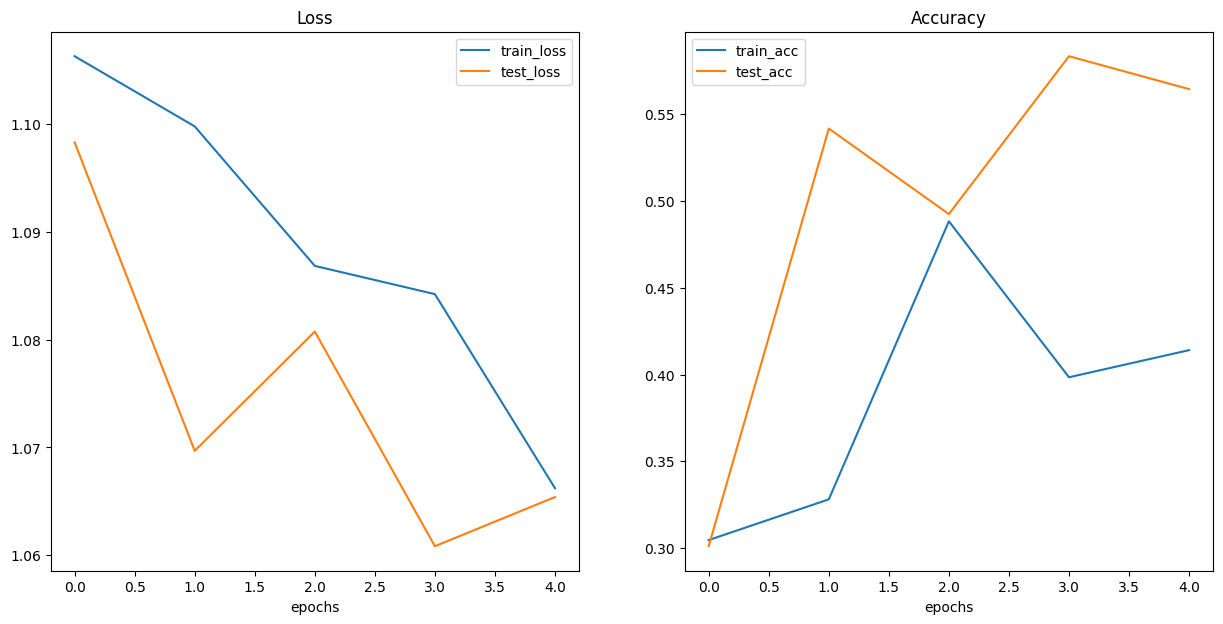

In [185]:
plot_loss_curve(model_0_results)

In [186]:
## Model_1 Building With Data Augmentation

In [187]:
##creating TriviailAugmentation
from torchvision import transforms

train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [188]:
##Creating Datasets and DataLoader
from torchvision import datasets

train_data_augmented = datasets.ImageFolder(
    root=train_dir,
    transform=train_transform_trivial
)
test_data_simple = datasets.ImageFolder(
    root = test_dir,
    transform = test_transform_simple
)

In [189]:
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)

train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        num_workers=NUM_WORKERS,
                                        shuffle=True)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                        batch_size=BATCH_SIZE,
                                        num_workers=NUM_WORKERS,
                                        shuffle=False)

In [190]:
model_1 = tinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)
model_1

tinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (claasifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [191]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(params= model_1.parameters(),
                             lr = 0.001)

from timeit import default_timer as timer
start_time = timer()

model_1_results = Train(model = model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimiser=optimiser,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

end_time = timer()
print(f"Total Train Time : {end_time-start_time :.3f} Seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch :0 | Train_loss : 1.1049 | Train_acc : 0.2500% | Test_loss : 1.1019 | Test_acc : 0.2604%
Epoch :1 | Train_loss : 1.0807 | Train_acc : 0.4258% | Test_loss : 1.1261 | Test_acc : 0.2604%
Epoch :2 | Train_loss : 1.0712 | Train_acc : 0.4258% | Test_loss : 1.1593 | Test_acc : 0.2604%
Epoch :3 | Train_loss : 1.1253 | Train_acc : 0.3047% | Test_loss : 1.1581 | Test_acc : 0.2604%
Epoch :4 | Train_loss : 1.0865 | Train_acc : 0.4258% | Test_loss : 1.1554 | Test_acc : 0.3333%
Total Train Time : 11.134 Seconds


In [192]:
model_1_results

{'train_loss': [1.104914203286171,
  1.0806865319609642,
  1.0711720064282417,
  1.125308334827423,
  1.0865339040756226],
 'train_acc': [0.25, 0.42578125, 0.42578125, 0.3046875, 0.42578125],
 'test_loss': [1.1019279559453328,
  1.1260557969411213,
  1.159274657567342,
  1.1580672065416973,
  1.1554409265518188],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.3333333333333333]}

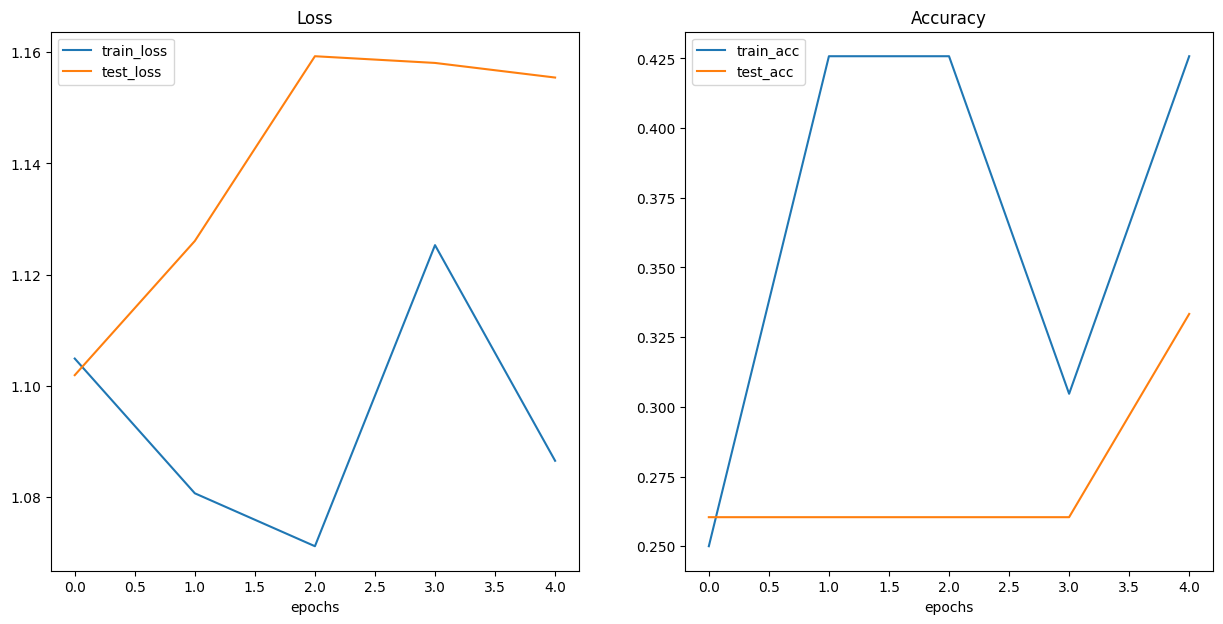

In [193]:
plot_loss_curve(model_1_results)

In [194]:
## Comparing Model Results
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

In [195]:
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.106319,0.304688,1.098321,0.301136
1,1.099806,0.328125,1.069690,0.541667
2,1.086854,0.488281,1.080757,0.492424
3,1.084233,0.398438,1.060832,0.583333
4,1.066216,0.414062,1.065396,0.564394


In [196]:
len(model_0_df)

5

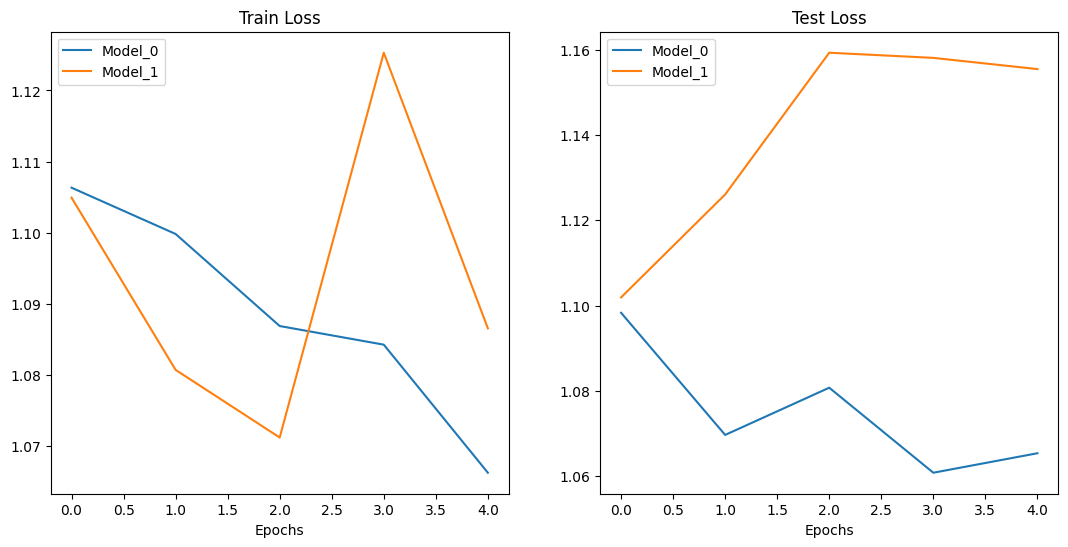

In [197]:
## PLoting
plt.figure(figsize=(13,6))
epochs = range(len(model_0_df))

plt.subplot(1,2,1)
plt.plot(epochs , model_0_df["train_loss"],label="Model_0")
plt.plot(epochs , model_1_df["train_loss"],label="Model_1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs , model_0_df["test_loss"],label="Model_0")
plt.plot(epochs , model_1_df["test_loss"],label="Model_1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

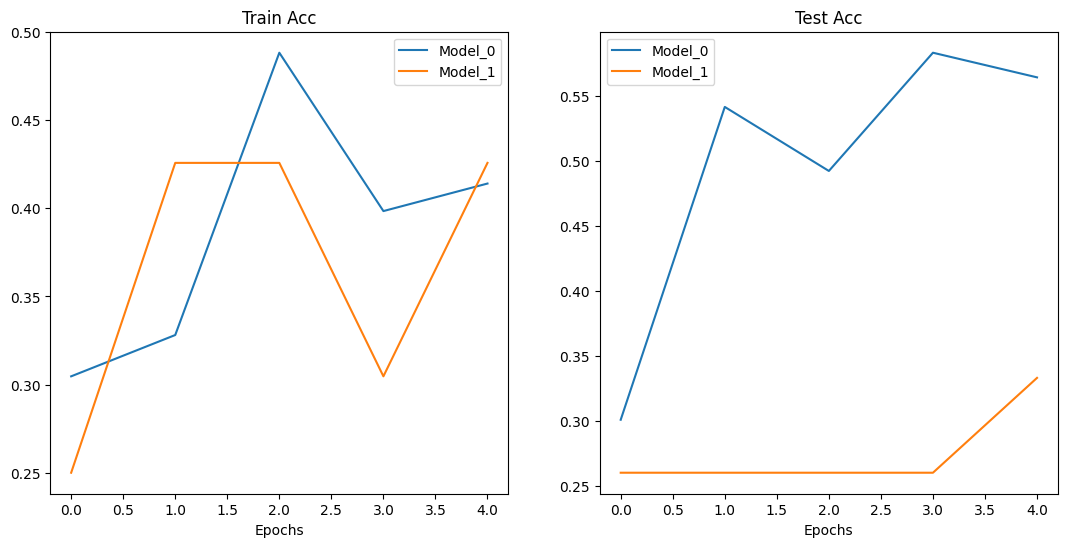

In [198]:
plt.figure(figsize=(13,6))
epochs = range(len(model_0_df))

plt.subplot(1,2,1)
plt.plot(epochs , model_0_df["train_acc"],label="Model_0")
plt.plot(epochs , model_1_df["train_acc"],label="Model_1")
plt.title("Train Acc")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs , model_0_df["test_acc"],label="Model_0")
plt.plot(epochs , model_1_df["test_acc"],label="Model_1")
plt.title("Test Acc")
plt.xlabel("Epochs")
plt.legend()